In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
insurance_df = pd.read_csv('../Course Materials/Data/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: xlabel='age', ylabel='charges'>

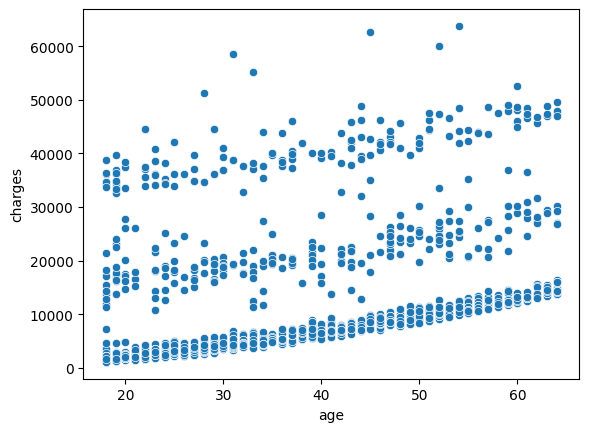

In [8]:
sns.scatterplot(insurance_df, x ='age', y ='charges')

In [9]:
features =['age', 'bmi', 'children']

X = sm.add_constant(insurance_df[features])
y = insurance_df['charges']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           8.80e-37
Time:                        01:42:58   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='None'>

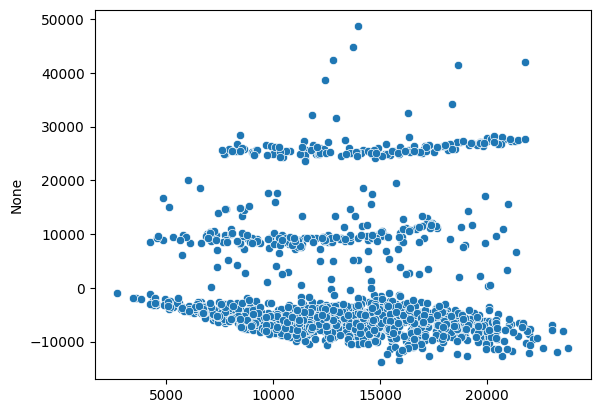

In [10]:
sns.scatterplot(x = model.predict(), y = model.resid)

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069], shape=(1338,)),
  array([-13883.78364557, -13438.7989169 , -12614.75938445, ...,
          42332.90584529,  44853.90870168,  48627.31414825], shape=(1338,))),
 (np.float64(9869.369097394587),
  np.float64(7.9416576214647e-12),
  np.float64(0.8672705406050434)))

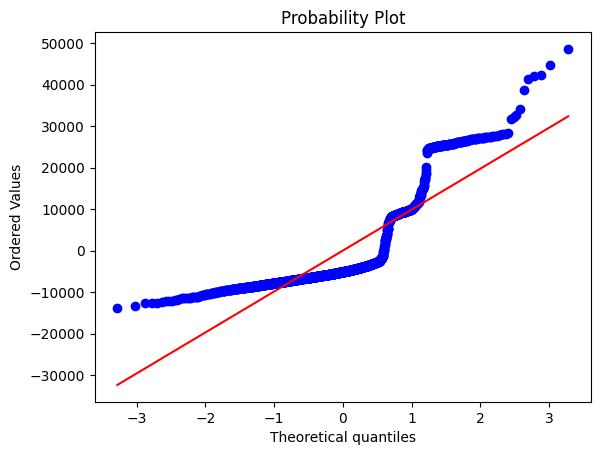

In [ ]:
# build a normality plot

import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(model.resid, dist = 'norm', plot = plt)

In [14]:
# Solution - log transformation on the target

y_log = np.log(insurance_df['charges'])

model_log = sm.OLS(y_log, X).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     193.7
Date:                Wed, 17 Dec 2025   Prob (F-statistic):          2.82e-104
Time:                        01:49:43   Log-Likelihood:                -1543.9
No. Observations:                1338   AIC:                             3096.
Df Residuals:                    1334   BIC:                             3117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3189      0.119     61.643      0.000       7.086       7.552
age            0.0336      0.002     22.331      0.000       0.031       0.037
bmi            0.0113      0.003      3.252      0.001       0.004       0.018
children       0.1057      0.017      6.058      0.000       0.071       0.140
==============================================================================
Omnibus:                      193.792   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.149
Skew:                           1.125   Prob(JB):                     1.20e-62
Kurtosis:                       3.219   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='None'>

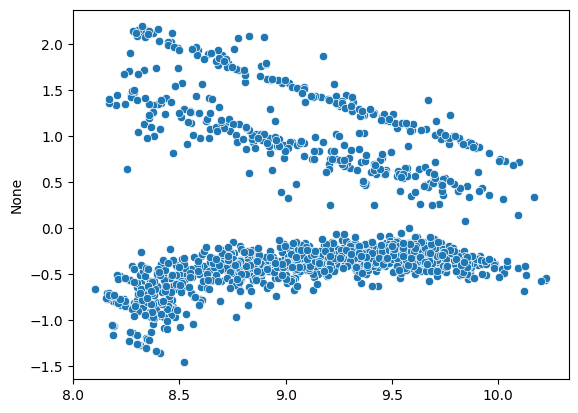

In [16]:
sns.scatterplot(x = model_log.predict(),y = model_log.resid)

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069], shape=(1338,)),
  array([-1.46394525, -1.36202871, -1.34321259, ...,  2.15583787,
          2.16564655,  2.19187645], shape=(1338,))),
 (np.float64(0.702871329937169),
  np.float64(2.2861201790378888e-15),
  np.float64(0.9142531031248115)))

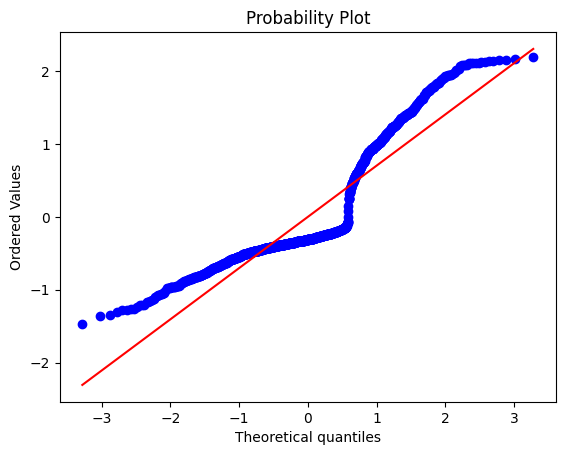

In [17]:
stats.probplot(model_log.resid, dist ='norm', plot = plt)

The possible solution is `boxcox` transformation: it looks at our data and tries to find the power transform  that mathematically is going to result in the closest value to normality. 